In [21]:
from dashboard.data_load import load_xena_metadata, load_autoimmune_atlas, load_sorf_df_conformed
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
xena_metadata, xena_transcript_ids = load_xena_metadata()
autoimmune_metadata = load_autoimmune_atlas()

In [15]:
sorf_df = load_sorf_df_conformed()

In [29]:
transcripts = [y for x in sorf_df['transcripts_exact'] for y in x]

In [31]:
selected_expression_tcga = pd.read_parquet('../../cache/xena_app.parq', columns=xena_transcript_ids)
#selected_expression_tcga_ave = selected_expression_tcga.groupby(xena_metadata['dashboard_group']).mean()

In [39]:
!aws s3 ls s3://velia-piperuns-dev/expression_atlas/v1/{velia_study}/de_results/{contrast}

2024-01-03 01:11:54  100878424 GSE102371_dds_gene.h5_ad
2024-01-03 01:11:55  179173416 GSE102371_dds_transcript.h5_ad
2024-01-03 01:11:57    8376510 GSE102371_gene_TYPE_1_DIABETES_vs_CONTROL.csv
2023-10-17 18:32:52       2202 GSE102371_metadata.csv
2024-01-03 01:11:57       2694 GSE102371_metadata_contrast.csv
2024-01-03 01:11:57   26851059 GSE102371_transcript_TYPE_1_DIABETES_vs_CONTROL.csv


In [1]:
import seaborn as sns

In [7]:
selection_df = pd.DataFrame([
    ('GSE102371', 'TYPE_1_DIABETES_vs_CONTROL'),
     ('GSE110914', 'PRE_TYPE_1_DIABETES_vs_CONTROL')
    ], columns = ['velia_study', 'contrast']
)
selection_df

,velia_study,contrast
0,GSE102371,TYPE_1_DIABETES_vs_CONTROL
1,GSE110914,PRE_TYPE_1_DIABETES_vs_CONTROL


In [8]:
# velia_study = 'GSE102371'
# contrast = 'TYPE_1_DIABETES_vs_CONTROL'

study_de = {}

velia_studies = selection_df['velia_study'].values
contrasts = selection_df['contrast'].values

for velia_study, contrast in zip(velia_studies, contrasts):
    de_path = f"s3://velia-piperuns-dev/expression_atlas/v1/{velia_study}/de_results/{velia_study}_transcript_{contrast}.csv"
    table = pd.read_csv(de_path, index_col=0)
    study_de[(velia_study, contrast)] = table



(array([0, 1]),
 [Text(0, 0, 'GSE102371--TYPE_1_DIABETES_vs_CONTROL'),
  Text(1, 0, 'GSE110914--PRE_TYPE_1_DIABETES_vs_CONTROL')])

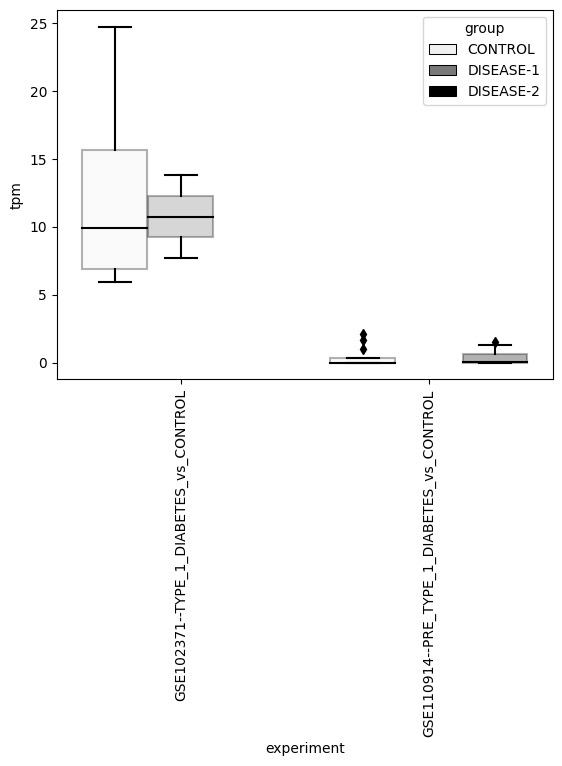

In [22]:
selected_transcript = 'ENST00000488147.1'
sample_exp = []
for (velia_study, contrast), table in study_de.items():
    s = pd.DataFrame([(k.split('_')[1], v) for k, v in table.loc[selected_transcript].items() if k.startswith('condition')], columns = ['group', 'tpm'])
    s['experiment'] = f"{velia_study}--{contrast}"
    sample_exp.append(s)
sample_exp = pd.concat(sample_exp, ignore_index=True)
sns.boxplot(sample_exp, hue='group', y='tpm', x='experiment', color='k', boxprops=dict(alpha=.3))
plt.xticks(rotation=90)

<AxesSubplot: xlabel='experiment', ylabel='tpm'>

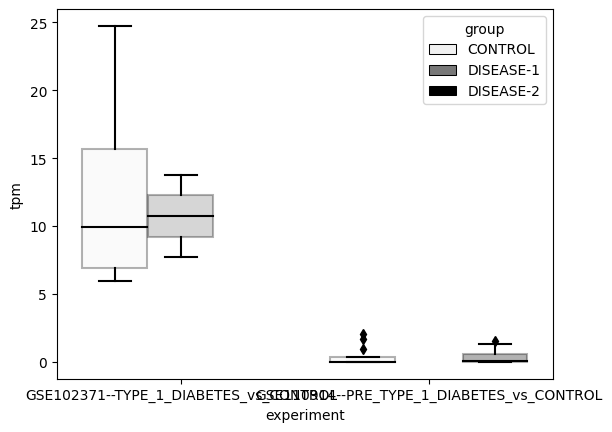

In [18]:

# sns.stripplot(sample_exp, hue='group', y='tpm', x='experiment', color='k')